In [30]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation


In [77]:
train_df = '../../final_project/train_users_2.csv'


airbnb_df = pd.read_csv(train_df)

In [78]:
airbnb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [79]:
airbnb_df = airbnb_df.drop('id', axis = 1)

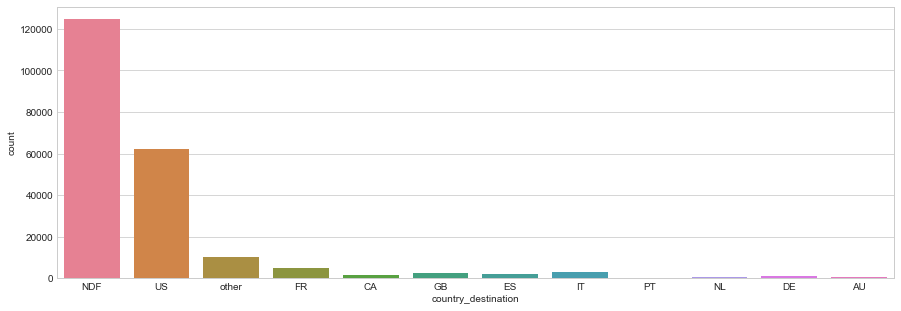

In [80]:
# country_destination

airbnb_df['booked'] = (airbnb_df['country_destination'] != 'NDF').astype(int)

# Plot the frequency for every country_destination value
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='country_destination', data=airbnb_df, palette="husl", ax=axis1)

In [81]:
airbnb_df['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

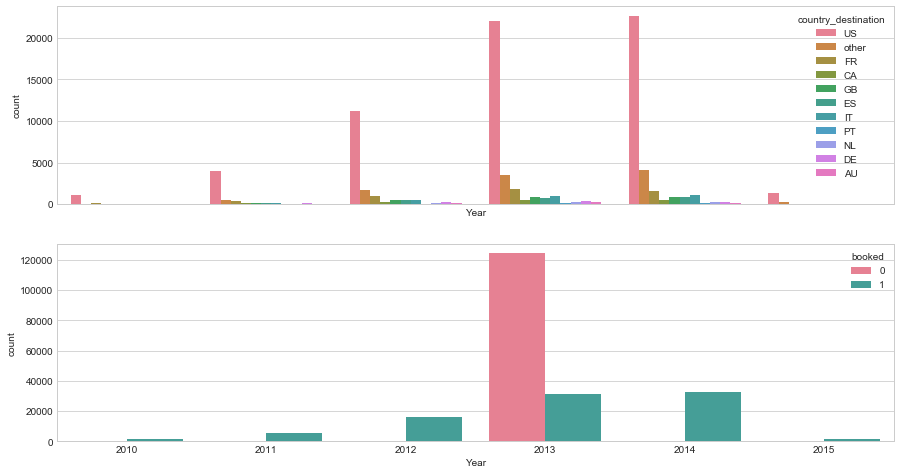

In [82]:
# date_first_booking

def get_year(date):
    if date == date: 
        return int(str(date)[:4])
    return date

def get_month(date):
    if date == date: 
        return int(str(date)[5:7])
    return date

# Create Year and Month columns
airbnb_df['Year']  = airbnb_df['date_first_booking'].apply(get_year)
airbnb_df['Month'] = airbnb_df['date_first_booking'].apply(get_month)


# fill NaN
airbnb_df['Year'].fillna(airbnb_df['Year'].median(), inplace=True)
airbnb_df['Month'].fillna(airbnb_df['Month'].median(), inplace=True)

# convert type to integer
airbnb_df[['Year', 'Month']] = airbnb_df[['Year', 'Month']].astype(int)

# Plot
fig, (axis1, axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# frequency of country_destination for every year
sns.countplot(x="Year",hue="country_destination", data=airbnb_df[airbnb_df['country_destination'] != 'NDF'], palette="husl", ax=axis1)

# frequency of booked Vs no-booking users for every year
# NOTICE that in year 2014, and 2015 there wasn't "no-booking"
sns.countplot(x="Year",hue="booked", data=airbnb_df, palette="husl", order=[2010,2011,2012,2013,2014,2015], ax=axis2)

# drop columns
airbnb_df.drop(['date_first_booking','Month'], axis=1, inplace=True)


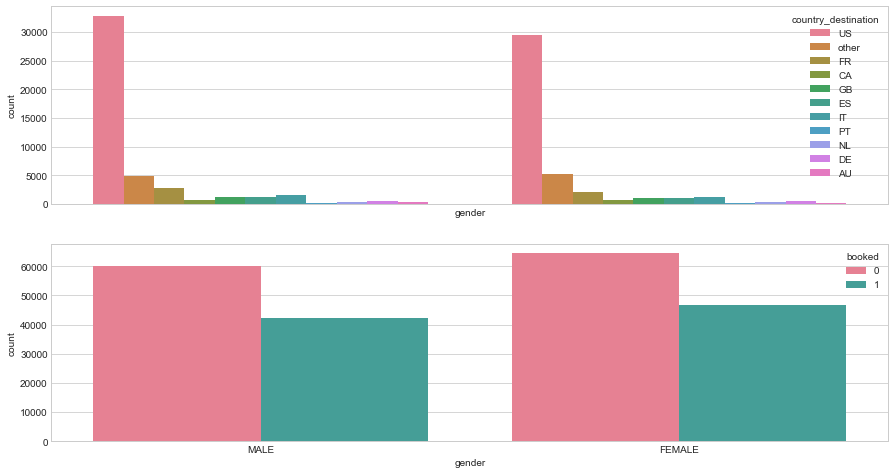

In [83]:
# gender

i = 0
def get_gender(gender):
    global i
    if gender != 'FEMALE' and gender != 'MALE':
        return 'FEMALE' if(i % 2) else 'MALE'
    i = i + 1
    return gender

# replace all values other than 'FEMALE' and 'MALE'
airbnb_df['gender'] = airbnb_df['gender'].apply(get_gender)

# Plot
fig, (axis1, axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# frequency of country_destination for every gender
sns.countplot(x="gender",hue="country_destination", data=airbnb_df[airbnb_df['country_destination'] != 'NDF'], palette="husl", ax=axis1)

# frequency of booked Vs no-booking users for every gender
sns.countplot(x="gender",hue="booked", data=airbnb_df, palette="husl", ax=axis2)

# Map gender values to 1s and 0s
airbnb_df["gender"] = airbnb_df["gender"].map({"FEMALE": 1, "MALE": 0})

# drop columns
airbnb_df.drop(['gender'], axis=1,inplace=True)


In [37]:
# age

# assign all age values > 100 to NaN, these NaN values will be replaced with real ages below
airbnb_df["age"][airbnb_df["age"] > 100] = np.NaN

# get average, std, and number of NaN values in airbnb_df
average_age_airbnb   = airbnb_df["age"].mean()
std_age_airbnb       = airbnb_df["age"].std()
count_nan_age_airbnb = airbnb_df["age"].isnull().sum()


# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_airbnb - std_age_airbnb, average_age_airbnb + std_age_airbnb, size = count_nan_age_airbnb)

# fill NaN values in Age column with random values generated
airbnb_df["age"][np.isnan(airbnb_df["age"])] = rand_1

# convert type to integer
airbnb_df['age'] = airbnb_df['age'].astype(int)

C:\Users\kfarkas\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\kfarkas\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


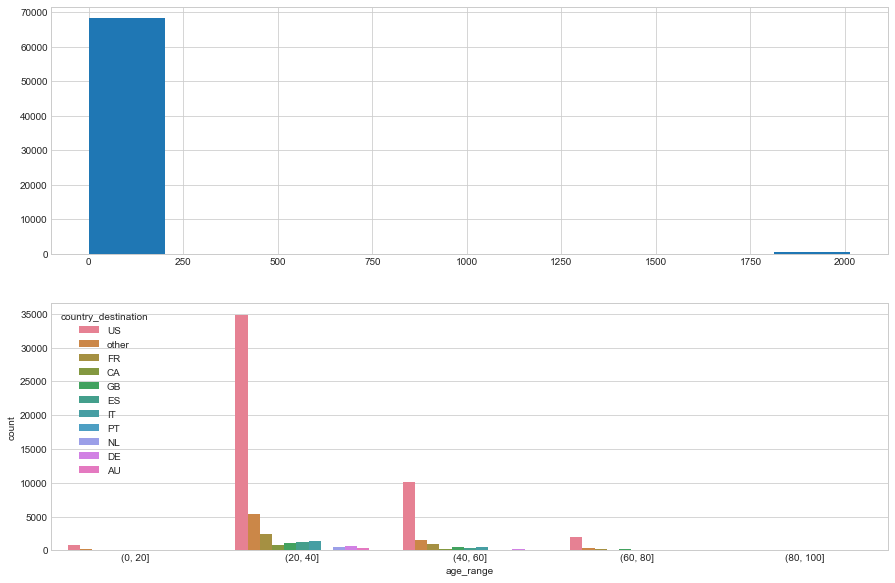

In [84]:
# Plot
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(15,10))

# frequency for age values(in case there was a booking)
airbnb_df['age'][airbnb_df['country_destination'] != 'NDF'].hist(ax=axis1)

# cut age values into ranges 
airbnb_df['age_range'] = pd.cut(airbnb_df["age"], [0, 20, 40, 60, 80, 100])

# frequency of country_destination for every age range
sns.countplot(x="age_range",hue="country_destination", data=airbnb_df[airbnb_df['country_destination'] != 'NDF'], palette="husl", ax=axis2)

# drop age_range
#airbnb_df.drop(['age_range'], axis=1, inplace=True)

# drop columns
#airbnb_df.drop(['age'], axis=1,inplace=True)


In [76]:
airbnb_df['age_range'] = pd.cut(airbnb_df["age"], [0, 20, 40, 60, 80, 100])


KeyError: 'age'

In [85]:
airbnb_df.groupby(['age_range'])['country_destination'].value_counts()

age_range  country_destination
(0, 20]    NDF                     1310
           US                       726
           other                    145
           FR                        84
           IT                        48
           ES                        39
           GB                        38
           CA                        33
           DE                        21
           NL                        13
           AU                         8
           PT                         4
(20, 40]   NDF                    37365
           US                     34837
           other                   5333
           FR                      2431
           IT                      1361
           ES                      1265
           GB                      1121
           CA                       714
           DE                       577
           NL                       433
           AU                       296
           PT                       112
(40, 60] 

In [39]:
# first_affiliate_tracked

# fill NaN values randomly
count_first_affiliate = 7    # len(np.unique(airbnb_df["first_affiliate_tracked"].value_counts()))

count_nan_department_airbnb = airbnb_df["first_affiliate_tracked"].isnull().sum()

rand_1 = np.random.randint(0, count_first_affiliate, size = count_nan_department_airbnb)

range_departments_airbnb = airbnb_df['first_affiliate_tracked'].value_counts().index

airbnb_df["first_affiliate_tracked"][airbnb_df["first_affiliate_tracked"] != airbnb_df["first_affiliate_tracked"]] = range_departments_airbnb[rand_1]

# drop columns
# airbnb_df.drop(['first_affiliate_tracked'], axis=1,inplace=True)
# test_df.drop(['first_affiliate_tracked'], axis=1,inplace=True)

C:\Users\kfarkas\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [40]:
# There are some columns with non-numerical values(i.e. dtype='object'),
# So, We will create a corresponding unique numerical value for each non-numerical value in a column of training and testing set.

from sklearn import preprocessing

for f in airbnb_df.columns:
    if f == "country_destination" or f == "id": continue
    if airbnb_df[f].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(np.unique(list(airbnb_df[f].values)))
        airbnb_df[f] = lbl.transform(list(airbnb_df[f].values))

In [48]:
airbnb_df.head()

,date_account_created,timestamp_first_active,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,booked,Year
0,170,20090319043255,1,0,5,2,4,6,2,3,8,NDF,0,2013
1,501,20090523174809,1,0,5,7,8,6,2,3,8,NDF,0,2013
2,262,20090609231247,0,3,5,2,4,6,2,6,21,US,1,2010
3,695,20091031060129,1,0,5,2,4,6,2,3,17,other,1,2012
4,248,20091208061105,0,0,5,2,4,6,2,3,8,US,1,2010


In [41]:
X = airbnb_df.drop(['country_destination'],axis=1)
y = airbnb_df["country_destination"]


In [42]:
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 4 )


In [49]:
#fit default model on the training set
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#Evaluate model on training data
model.score(X_train, y_train)

0.95185148168507316

In [50]:
model.score(X_test, y_test)

0.80091074339898427